<h1 align="center" style="color:#6699ff"> DataCamp IEEE Fraud Detection </h1>

<img src="https://github.com/DataCampM2DSSAF/suivi-du-data-camp-equipe-tchouacheu-niang-chokki/blob/master/img/credit-card-fraud-detection.png?raw=true" width="800" align="right">

#  <a style="color:#6699ff"> Team </a>
- <a style="color:#6699ff">Mohamed NIANG </a>
- <a style="color:#6699ff">Fernanda Tchouacheu </a>
- <a style="color:#6699ff">Hypolite Chokki </a>

# <a style="color:#6699ff">  Table of Contents</a> 

<a style="color:#6699ff"> I. Introduction</a>

<a style="color:#6699ff"> II. Descriptive Statistics & Visualization</a>

<a style="color:#6699ff"> III. Preprocessing</a>

<a style="color:#6699ff"> IV. Machine Learning Models</a>

# <a style="color:#6699ff"> II. Descriptive Statistics & Visualization Part 2</a>

**Objectif**: prédire la probabilité que la transaction soit frauduleuse 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

In [2]:
import os
import gc
import time

In [62]:
#! pip install graphviz

In [3]:
import graphviz

In [4]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.7.1.final.0
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.23.4
pytest: 4.0.2
pip: 18.1
setuptools: 40.6.3
Cython: 0.29.2
numpy: 1.15.4
scipy: 1.1.0
pyarrow: None
xarray: None
IPython: 7.2.0
sphinx: 1.8.2
patsy: 0.5.1
dateutil: 2.7.5
pytz: 2018.7
blosc: None
bottleneck: 1.2.1
tables: 3.4.4
numexpr: 2.6.8
feather: None
matplotlib: 3.0.2
openpyxl: 2.5.12
xlrd: 1.2.0
xlwt: 1.3.0
xlsxwriter: 1.1.2
lxml: 4.2.5
bs4: 4.6.3
html5lib: 1.0.1
sqlalchemy: 1.2.15
pymysql: None
psycopg2: None
jinja2: 2.10
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None


# Train data

In [6]:
train_transaction = pd.read_csv("train_transaction.csv",sep=",")
#train_identity= pd.read_csv("train_identity.csv",sep=",")

In [7]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
train.shape

(590540, 434)

In [5]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [8]:
train = pd.merge(train_transaction , train_identity, on='TransactionID',how='left')
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [41]:
train_mani=train.iloc[0:100]
train_mani.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


# Test data

In [8]:
test_transaction = pd.read_csv("test_transaction.csv")
#test_transaction.head()
#test_identity= pd.read_csv("test_identity.csv",sep=",")

In [9]:
test=pd.merge(test_transaction ,test_identity, on='TransactionID',how='left')
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
test.shape

(506691, 433)

Détail features:
 
* TransactionID:
* isFraud:
* TransactionDT: delta temporel à partir d'une date de référence donnée
* TransactionAmt:montant du paiement de la transaction en USD
* ProductCD:code produit, le produit pour chaque transaction
* card1-card6:informations sur la carte de paiement,telles que le type de carte,la catégorie de carte,la banque d'émission,le     pays,etc
* addr1-addr2:adresse 
* dist1-dist2:distance 
* P_emaildomain et R_emaildomain:domaine de messagerie de l'acheteur et du destinataire
* c1-c14:comptage,comme le nombre d'adresses qui sont associées à la carte de paiement 
* D1-D15:delta temporel, comme les jours entre la transaction précédente.
* M1-M9:correspondance,comme les noms sur la carte et l'adresse, etc
* V1-V339:Vesta a conçu de riches fonctionnalités, notamment le classement, le comptage et d'autres relations d'entité


In [29]:
print("Au total nous avons "+ str(train.isnull().any().sum()) +" colonnes dans le train avec des valeurs manquantes")

Au total nous avons 414 colonnes dans le train avec des valeurs manquantes


In [16]:
one_value_cols = [col for col in train.columns if train[col].nunique() <= 1]
one_value_cols_test = [col for col in test.columns if test[col].nunique() <= 1]
one_value_cols == one_value_cols_test

False

In [18]:
one_value_cols_test # peut endeduire que cette colonne n'apporte aucune information à notre jeu de donnée

['V107']

In [28]:
train.isnull().sum().sum()/(train.shape[0]*train.shape[1])

0.45074371905803934

ceci montre qu'on a environ 45%  de l'information manquantes 

In [22]:
# missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
dist2,552913,0.936284
D7,551623,0.934099
D13,528588,0.895093
D14,528353,0.894695
D12,525823,0.890410
D6,517353,0.876068
D8,515614,0.873123
D9,515614,0.873123
V142,508595,0.861237
V157,508595,0.861237


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


on constate qu'on a beaucoup de valeurs manquantes ce qui est tout à fait normal dans la vraie vie, il y'a beaucoup de **variables continues** et quelques **variables catégorielles.**

* Tout d'abord nous allons explorer chacunes de ces variables
* Ensuite nous allons voir si est bon de supprimer les variables avec  trop de valeurs manquantes 

# V1-V339

On observe beaucoup de NaN , de 0 et de 1

**Question**:on se demande si on doit le supprimer de la dataset? car trop de valeur manquantes

In [9]:
V_cols=train_transaction.iloc[:,55:393]

In [10]:
V_cols.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338
count,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000
mean,0.999945,1.045204,1.078075,0.846456,0.876991,1.045686,1.072870,1.027704,1.041529,0.463915,...,1.312844,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542
std,0.007390,0.240133,0.320890,0.440053,0.475902,0.239385,0.304779,0.186069,0.226339,0.521522,...,8.769083,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,1.000000,8.000000,9.000000,6.000000,6.000000,9.000000,9.000000,8.000000,8.000000,4.000000,...,99.000000,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000


In [13]:
train_transaction['v_mean'] =V_cols.mean(axis=1)

In [14]:
train_transaction['v_mean'].head()

0      3.271605
1      0.313609
2      0.388889
3     66.573964
4    802.925357
Name: v_mean, dtype: float64

In [19]:
train_identity.shape

(144233, 41)

In [26]:
train_identity.columns.tolist()

['TransactionID',
 'id_01',
 'id_02',
 'id_03',
 'id_04',
 'id_05',
 'id_06',
 'id_07',
 'id_08',
 'id_09',
 'id_10',
 'id_11',
 'id_12',
 'id_13',
 'id_14',
 'id_15',
 'id_16',
 'id_17',
 'id_18',
 'id_19',
 'id_20',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_32',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo']

## Exploration des données

**objectif:**

* Description rapide de la dataset (le nombre de colonnes,valeurs manquantes,types de la dataset)

* Nettoyer les données corrompues; gérer les données manquantes, les types de données invalides, les valeurs incorrectes

* Visualisez les distributions de données; graphiques à barres, histogrammes, boîtes à moustaches

* Visualiser la corrélations entre les differentes variables(features)



### TransactionID

In [31]:
# ici nous verrons la correspondances entre l'indentité de transaction de la dataset train-transaction et celle de train_identity
print(np.sum(train_transaction['TransactionID'].isin(train_identity['TransactionID'].unique())))
print(np.sum(test_transaction['TransactionID'].isin(test_identity['TransactionID'].unique())))

144233
141907


In [34]:
print(". on a " + str(144233/590540) + " de TransactionID de train_transaction qui a une association dans train_identity")
print(". on a " + str(141907/590540) + " de TransactionID de test_transaction qui a une association dans test_identity")

. on a 0.2442391709283029 de TransactionID de train_transaction qui a une association dans train_identity
. on a 0.24030040302096387 de TransactionID de test_transaction qui a une association dans test_identity


### TransactionDT

Text(0.5, 1.0, 'Distribution of transactiond dates train vs test')

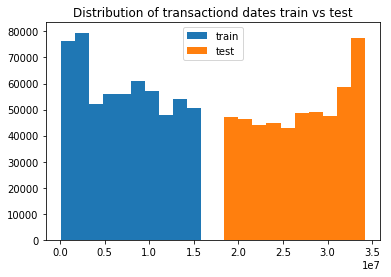

In [37]:
plt.hist(train['TransactionDT'], label='train')
plt.hist(test['TransactionDT'], label='test')
plt.legend()
plt.title('Distribution of transactiond dates train vs test')

il semble que les dates des transactions de train et de test ne se chevauchent pas, il serait donc prudent d'utiliser la répartition temporelle pour la validation.

### TransactionAmt

In [43]:
#train['TransactionAmt'].min(),train['TransactionAmt'].max(),train['TransactionAmt'].mean()
train["TransactionAmt"].describe()
#test["TransactionAmt"].describe() 

count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

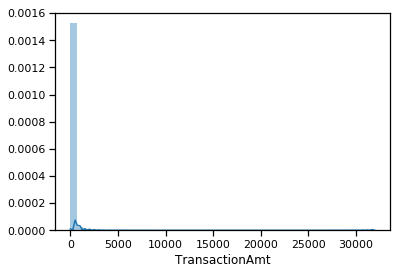

In [32]:
#histogram
sns.set_context('notebook')
sns.distplot(train['TransactionAmt'],kde=True)

on va tracer la fraude en fonction de la TransactionID et de TransactionAmt

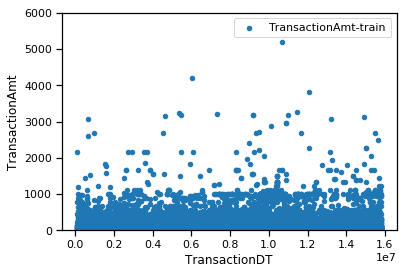

In [58]:
train.loc[train_transaction['isFraud'] == 1].plot.scatter(x='TransactionDT', y='TransactionAmt', ylim=(0,6000),label='TransactionAmt-train')

In [42]:
train_transaction.loc[train_transaction['isFraud'] == 1]["TransactionAmt"].describe()

count    20663.000000
mean       149.244779
std        232.212163
min          0.292000
25%         35.044000
50%         75.000000
75%        161.000000
max       5191.000000
Name: TransactionAmt, dtype: float64

* En moyenne le montant fraudé est de **149,244**
* le minimun es de **0.29**
* le maximun est de **5191**

### Target Distribution isFraud

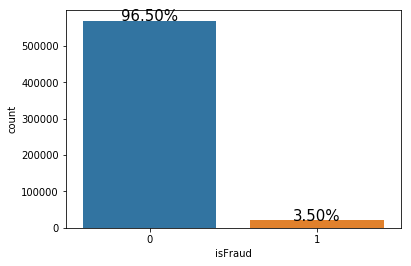

In [13]:
g=sns.countplot(train['isFraud'])
total = train.shape[0]
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 


Dans ce cas on peut endéduire que les labels ne sont pas équilibre => lors de la construction du modèle on doit faire attention 
a bien les stratifié

In [70]:
len(train[train['isFraud']==1]['isFraud'])/len(train['isFraud'])

0.03499000914417313

on a donc la dataset train comporte environ **3.49%** des transactions fraudées

### ProductCD

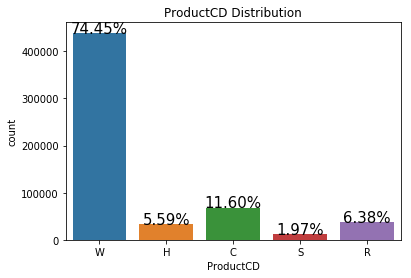

In [23]:
g_1=sns.countplot(train['ProductCD'])
g_1.set_title("ProductCD Distribution")
total = train.shape[0]
for p in g_1.patches:
    height = p.get_height()
    g_1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 


In [73]:
train_transaction.groupby('ProductCD')['isFraud'].mean()

ProductCD
C    0.116873
H    0.047662
R    0.037826
S    0.058996
W    0.020399
Name: isFraud, dtype: float64

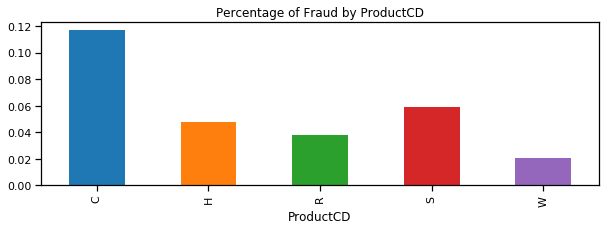

In [87]:
train.groupby('ProductCD')['isFraud'] \
    .mean() \
    .sort_index() \
    .plot(kind='bar',
          figsize=(10, 3),
         title='Percentage of Fraud by ProductCD')
plt.show()

### Card1-Card6

In [89]:
card_cols = [c for c in train_transaction.columns if 'card' in c]
train[card_cols].head()

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit


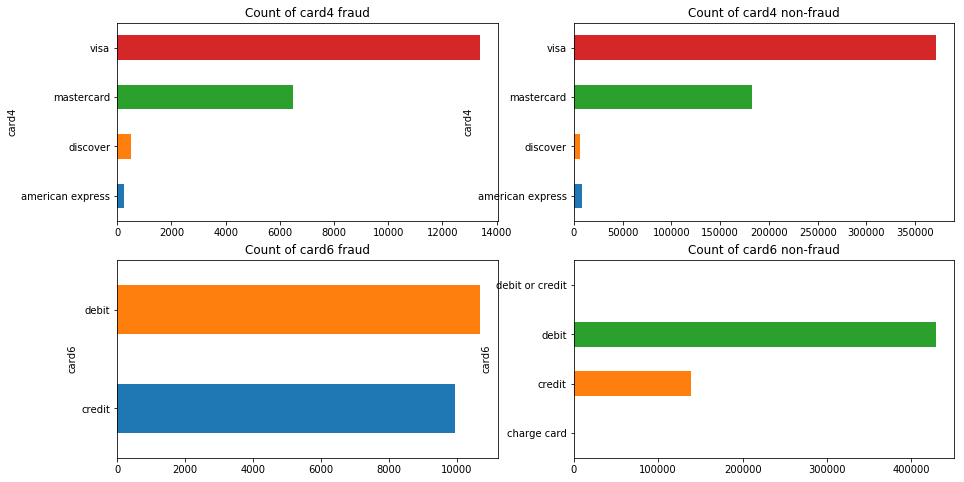

In [9]:
train_fr = train.loc[train_transaction['isFraud'] == 1]
train_nofr = train.loc[train_transaction['isFraud'] == 0]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))
train_fr.groupby('card4')['card4'].count().plot(kind='barh', ax=ax1, title='Count of card4 fraud')
train_nofr.groupby('card4')['card4'].count().plot(kind='barh', ax=ax2, title='Count of card4 non-fraud')
train_fr.groupby('card6')['card6'].count().plot(kind='barh', ax=ax3, title='Count of card6 fraud')
train_nofr.groupby('card6')['card6'].count().plot(kind='barh', ax=ax4, title='Count of card6 non-fraud')
plt.show()


In [21]:
train.columns.tolist()

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V

### Addr1-Addr2

In [58]:
(train['addr1'].isna().sum()/train.shape[0])*100

11.12642666034477

In [29]:
train[["addr1","addr2"]].nunique()

addr1    332
addr2     74
dtype: int64

In [32]:
train["addr2"].head()

0    87.0
1    87.0
2    87.0
3    87.0
4    87.0
Name: addr2, dtype: float64

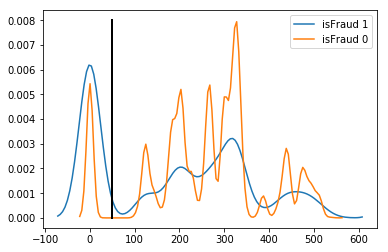

In [80]:
X=train[['addr1','isFraud']]
X['addr1'].fillna(0, inplace=True)
X[X['isFraud']==1]['addr1'].head()
sns.kdeplot(X[X['isFraud']==1]['addr1'], label='isFraud 1');
sns.kdeplot(X[X['isFraud']==0]['addr1'], label='isFraud 0');
plt.plot([50.0, 50.0], [0.0000, 0.008], sns.xkcd_rgb["black"], lw=2)

### dist1-dist2

In [89]:
dist=train[['dist1','dist2']]

In [98]:
dist.isna().sum()/train.shape[0]*100

dist1    59.652352
dist2    93.628374
dtype: float64

In [16]:
train['isFraud'].groupby(train['dist1'].fillna('Miss') == 'Miss').mean()

dist1
False    0.019956
True     0.045158
Name: isFraud, dtype: float64

### P_emaildomain & R_emaildomain

In [19]:
train.loc[train['R_emaildomain'].isin(['gmail.com', 'gmail']),'R_emaildomain'] = 'Google'

train.loc[train['R_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                             'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                             'yahoo.es']), 'R_emaildomain'] = 'Yahoo Mail'

train.loc[train['R_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                             'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                             'outlook.es', 'live.com', 'live.fr',
                                             'hotmail.fr']), 'R_emaildomain'] = 'Microsoft'

train.loc[train.R_emaildomain.isin(train.R_emaildomain\
                                         .value_counts()[train.R_emaildomain.value_counts() <= 300 ]\
                                         .index), 'R_emaildomain'] = "Others"

train.R_emaildomain.fillna("NoInf", inplace=True)

In [36]:
train['isFraud'].plot(ax=g_1,secondary_y=True)

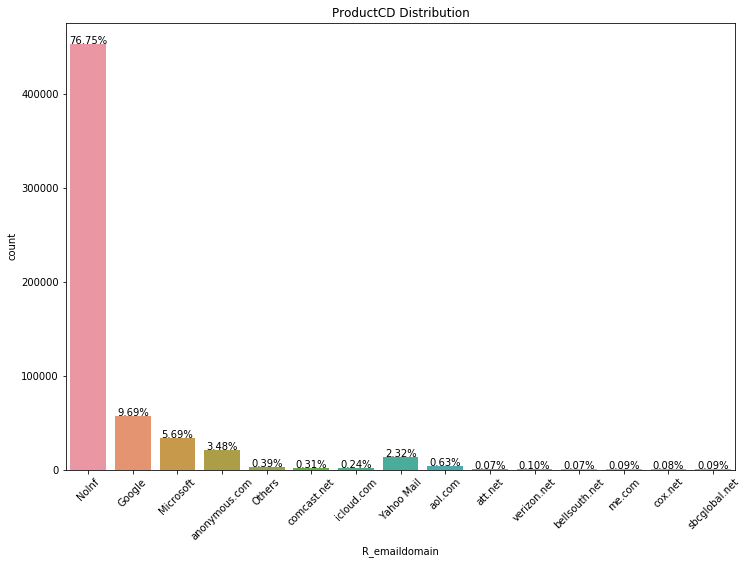

In [32]:
plt.figure(figsize=(12,8))
g_1=sns.countplot(train['R_emaildomain'])
g_1.set_title("ProductCD R_emaildomain")
g_1.set_xticklabels(g_1.get_xticklabels(),rotation=45)
total = train.shape[0]
for p in g_1.patches:
    height = p.get_height()
    g_1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10) 
plt.subplots_adjust(hspace=.4, top = 0.9)

In [52]:
 def ploting_cnt_amt(df, col, lim=2000):
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    
    plt.figure(figsize=(16,14))    
    plt.suptitle(f'{col} Distributions ', fontsize=24)
    
    plt.subplot(211)
    g = sns.countplot( x=col,  data=df, order=list(tmp[col].values))
    gt = g.twinx()
    gt = sns.pointplot(x=col, y='Fraud', data=tmp, order=list(tmp[col].values),
                       color='black', legend=False, )
    gt.set_ylim(0,tmp['Fraud'].max()*1.1)
    gt.set_ylabel("%Fraud Transactions", fontsize=16)
    g.set_title(f"Most Frequent {col} values and % Fraud Transactions", fontsize=20)
    g.set_xlabel(f"{col} Category Names", fontsize=16)
    g.set_ylabel("Count", fontsize=17)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    sizes = []
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center",fontsize=12) 
        
    g.set_ylim(0,max(sizes)*1.15)
    
    #########################################################################
    perc_amt = (df.groupby(['isFraud',col])['TransactionAmt'].sum() \
                / df.groupby([col])['TransactionAmt'].sum() * 100).unstack('isFraud')
    perc_amt = perc_amt.reset_index()
    perc_amt.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    amt = df.groupby([col])['TransactionAmt'].sum().reset_index()
    perc_amt = perc_amt.fillna(0)
    plt.subplot(212)
    g1 = sns.barplot(x=col, y='TransactionAmt', 
                       data=amt, 
                       order=list(tmp[col].values))
    g1t = g1.twinx()
    g1t = sns.pointplot(x=col, y='Fraud', data=perc_amt, 
                        order=list(tmp[col].values),
                       color='black', legend=False, )
    g1t.set_ylim(0,perc_amt['Fraud'].max()*1.1)
    g1t.set_ylabel("%Fraud Total Amount", fontsize=16)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    g1.set_title(f"{col} by Transactions Total + %of total and %Fraud Transactions", fontsize=20)
    g1.set_xlabel(f"{col} Category Names", fontsize=16)
    g1.set_ylabel("Transaction Total Amount(U$)", fontsize=16)
    g1.set_xticklabels(g.get_xticklabels(),rotation=45)    
    
    for p in g1.patches:
        height = p.get_height()
        g1.text(p.get_x()+p.get_width()/2,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center",fontsize=12) 
        
    plt.subplots_adjust(hspace=.4, top = 0.9)
    plt.show()


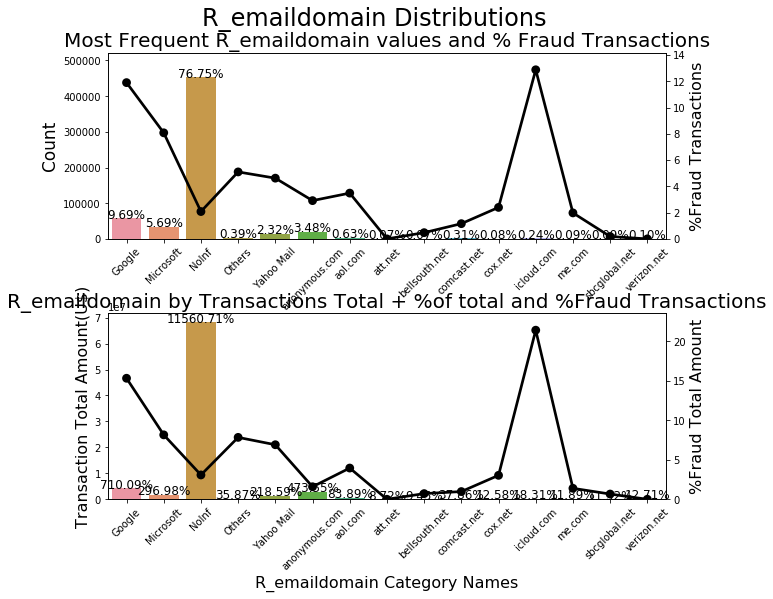

In [44]:
ploting_cnt_amt(train, 'R_emaildomain')

Nous pouvons voir une distribution très similaire dans les deux fonctionnalités du domaine de messagerie.
Il est intéressant que nous ayons des valeurs élevées dans les fraudes google et icloud.

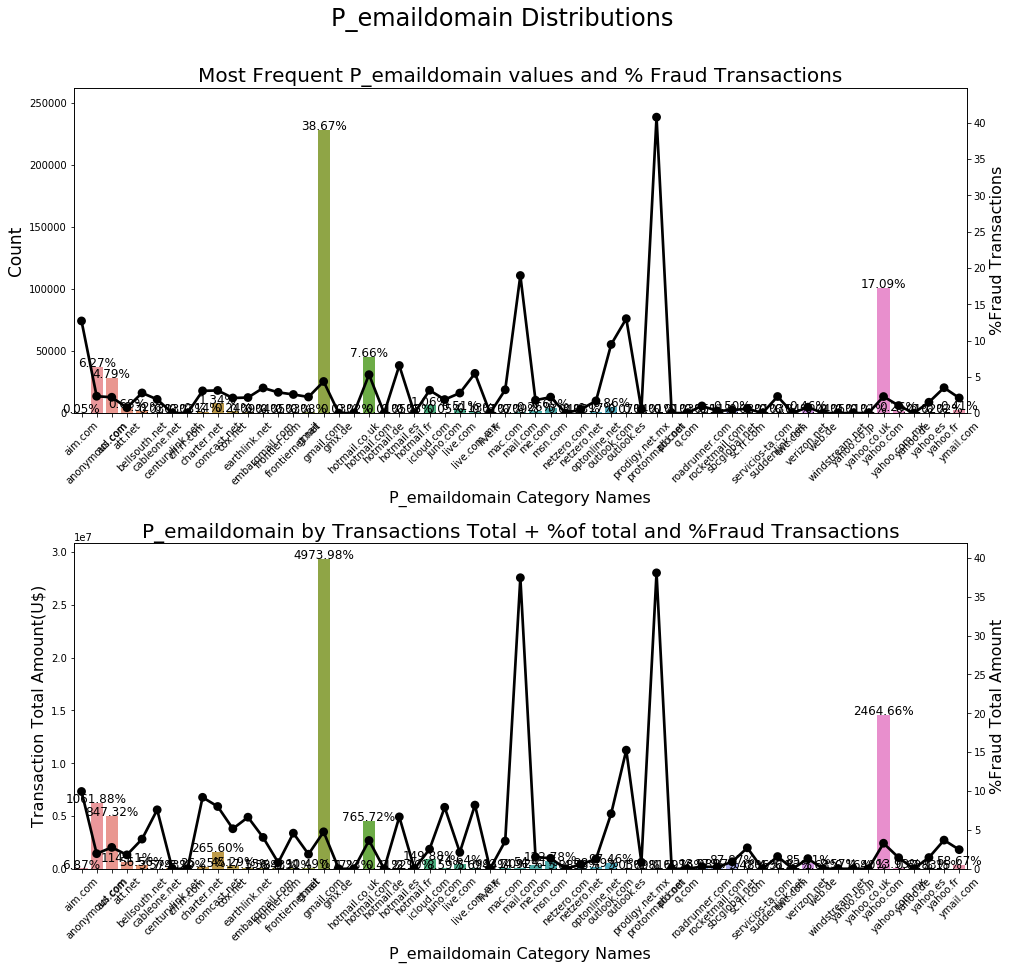

In [53]:
ploting_cnt_amt(train, 'P_emaildomain')

### C1-C14

In [62]:
col_c=[i for i in train.columns if i[0]=='C']

In [63]:
data_c=train[col_c]
data_c.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
